In [168]:
#d = 3
#c = 0.6
#k = 0.25
#b = 0.65

d = 5
c = 0.6
k = 0.25
b = 0.15

pricefactor = 0.45

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

def price(q1, q2):
    return d - q1 - q2


In [189]:
# In a 4 oligopoly
print("  Model  |     Unit qty    |   Total quantity   |      Price     |    Unit Profit   |  Total Profit")

q_comp4 = d / (4+2*c)
q_cournot4 = d / (5 + 2 * c)

Q_comp4 = 4 * q_comp4
p_comp4 = price(q_comp4*2, q_comp4*2)
profit_comp4 = profit(q_comp4, 3*q_comp4)

print("Comp      ", q_comp4, Q_comp4, p_comp4, profit_comp4, profit_comp4*4)

Q_cournot4 = 4 * q_cournot4
p_cournot4 = price(q_cournot4*2, q_cournot4*2)
profit_cournot4 = profit(q_cournot4, 3*q_cournot4)
print("Cournot   ", q_cournot4, Q_cournot4, p_cournot4, profit_cournot4, profit_cournot4*4)

q_cartel4 = d / (2 * (4+c))
p_cartel4 = price(q_cartel4, q_cartel4*3)
profit_cartel4 = profit(q_cartel4, 3*q_cartel4)
print("Cartel    ", q_cartel4, 4*q_cartel4, p_cartel4, profit_cartel4, profit_cartel4*4)




  Model  |     Unit qty    |   Total quantity   |      Price     |    Unit Profit   |  Total Profit
Comp       0.9615384615384615 3.846153846153846 1.1538461538461542 0.2886834319526628 1.154733727810651
Cournot    0.8064516129032258 3.225806451612903 1.774193548387097 0.41014568158168574 1.640582726326743
Cartel     0.5434782608695653 2.173913043478261 2.826086956521739 0.4896739130434783 1.9586956521739132


In [190]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j*4)] = profit(incr/1000, (j/1000)*4)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, (j/1000))

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.999, 0.004] 0.9985506000000001
Min Profit:  [0.999, 3.996] 0.0015486000000000666


In [191]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j*4)] = price(i/1000, (j/1000)*4)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.004] Raw:  4.995 Discounted:  2.24775
Min Price:  [0.999, 3.996] Raw:  0.0050000000000003375 Discounted:  0.002250000000000152


[0, 1.5625, 0.09765625, 1.470947265625, 0.1834869384765625, 1.3904809951782227, 0.25892406702041626, 1.3197586871683598, 0.32522623077966273, 1.2576004086440662, 0.38349961689618794, 1.2029691091598238, 0.4347164601626652, 1.1549533185975014, 0.47973126381484255, 1.1127519401735848, 0.5192950560872643, 1.0756608849181897, 0.5540679203891973, 1.0430613246351275, 0.584630008154568, 1.0144093673550925, 0.6114912181046006, 0.989226983026937, 0.6350997034122465, 0.967094028051019, 0.6558493487021699, 0.9476412355917154, 0.6740863416327666, 0.9305440547192814, 0.6901149487006738, 0.9155172355931182, 0.7042025916314517, 0.9023100703455139, 0.7165843090510806, 0.8907022102646117, 0.7274666778769264, 0.8804999894903814, 0.7370312598527673, 0.8715331938880307, 0.7454376307299712, 0.8636522211906519, 0.7528260426337641, 0.8567255850308464, 0.7593197640335816, 0.850637721218517, 0.7650271363576405, 0.8452870596647118, 0.7700433815643326, 0.8405843297834383, 0.7744521908280263, 0.8364510710987252, 

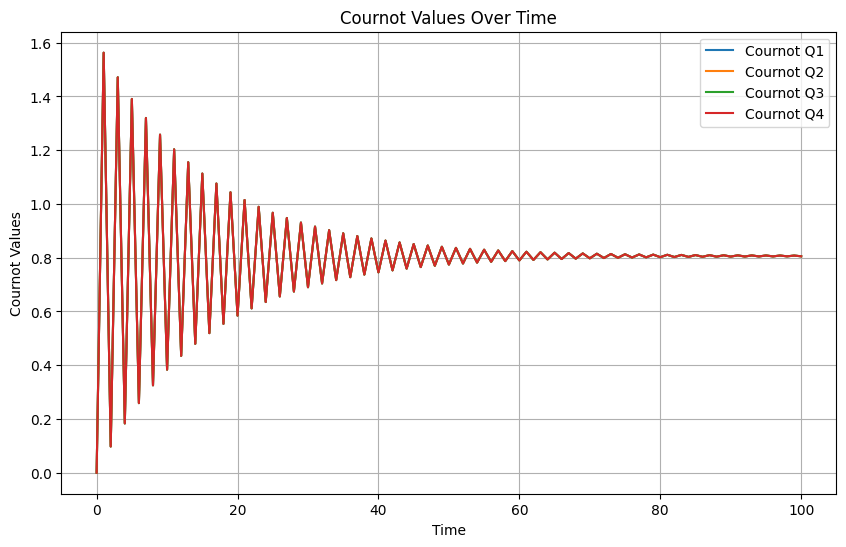

In [192]:
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))

print(pastItCournotValues1)
print(pastItCournotValues2)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastItCournotValues1)), pastItCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastItCournotValues2)), pastItCournotValues2, label='Cournot Q2')
plt.plot(range(len(pastItCournotValues3)), pastItCournotValues3, label='Cournot Q3')
plt.plot(range(len(pastItCournotValues4)), pastItCournotValues4, label='Cournot Q4')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()